In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import VarianceThreshold

In [154]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,0,6,148,72,35,0,33.6,0.627,50,1,B,1,IND,50
1,1,1,85,66,29,0,26.6,0.351,31,0,B,1,IND,31
2,2,8,183,64,0,0,23.3,0.672,32,1,B,1,IND,32
3,3,1,89,66,23,94,28.1,0.167,21,0,B,1,IND,21
4,4,0,137,40,35,168,43.1,2.288,33,1,B,1,IND,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0,W,1,IND,63
764,764,2,122,70,27,0,36.8,0.340,27,0,W,1,IND,27
765,765,5,121,72,23,112,26.2,0.245,30,0,W,1,IND,30
766,766,1,126,60,0,0,30.1,0.349,47,1,W,1,IND,47


In [155]:
data.shape,data.columns

((768, 14), Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
        'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
        'Outcome', 'HairColor', 'Adult', 'Country', 'Age_1'],
       dtype='object'))

In [156]:
data.drop('Unnamed: 0',axis = 1, inplace = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,1,B,1,IND,50
1,1,85,66,29,0,26.6,0.351,31,0,B,1,IND,31
2,8,183,64,0,0,23.3,0.672,32,1,B,1,IND,32
3,1,89,66,23,94,28.1,0.167,21,0,B,1,IND,21
4,0,137,40,35,168,43.1,2.288,33,1,B,1,IND,33


### Label encoding

In [157]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
data['HairColor'] = lbl.fit_transform(data['HairColor'])
data['Country'] = lbl.fit_transform(data['Country'])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0,50
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,31
2,8,183,64,0,0,23.3,0.672,32,1,0,1,0,32
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,21
4,0,137,40,35,168,43.1,2.288,33,1,0,1,0,33


In [158]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

x,y

(     Pregnancies  Glucose  BloodPressure  ...  Adult  Country  Age_1
 0              6      148             72  ...      1        0     50
 1              1       85             66  ...      1        0     31
 2              8      183             64  ...      1        0     32
 3              1       89             66  ...      1        0     21
 4              0      137             40  ...      1        0     33
 ..           ...      ...            ...  ...    ...      ...    ...
 763           10      101             76  ...      1        0     63
 764            2      122             70  ...      1        0     27
 765            5      121             72  ...      1        0     30
 766            1      126             60  ...      1        0     47
 767            1       93             70  ...      1        0     23
 
 [768 rows x 12 columns], 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length:

### For better accuracy using upsampling from SMOTEENN

In [159]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_upsampled,y_upsampled=sm.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_upsampled,y_upsampled,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((416, 12), (104, 12), (416,), (104,))

### Constant Feautres Removal

In [160]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [161]:
constant_filter.get_support().sum()

10

In [162]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False]

In [163]:
x_train = constant_filter.transform(x_train)
x_test = constant_filter.transform(x_test)
x_train.shape,x_test.shape

((416, 10), (104, 10))

### Quasi constant feature removal

In [164]:
quasi_constant_filter = VarianceThreshold(threshold=0.1)
quasi_constant_filter.fit(x_train)

VarianceThreshold(threshold=0.1)

In [165]:
quasi_constant_filter.get_support().sum()

8

In [166]:
quasi_constant_list = [not temp for temp in quasi_constant_filter.get_support()]
quasi_constant_list 

[False, False, False, False, False, False, True, False, True, False]

In [167]:
x_train = quasi_constant_filter.transform(x_train)
x_test = quasi_constant_filter.transform(x_test)
x_train.shape,x_test.shape

((416, 8), (104, 8))

### Remove Duplicate Features


In [168]:
x_train_T = x_train.T
x_test_T = x_test.T

x_train_T.shape,x_test_T.shape

((8, 416), (8, 104))

In [169]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [170]:
x_train_T.duplicated().sum()

1

In [171]:
duplicated_features = x_train_T.duplicated()
duplicated_features

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool

In [172]:
features_to_keep = [not data for data in duplicated_features]
features_to_keep

[True, True, True, True, True, True, True, False]

In [173]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [174]:
x_train_unique.shape,x_test_unique.shape

((416, 7), (104, 7))

In [175]:
x_train_unique.head()

,0,1,2,3,4,5,6
0,4.0,127.0,88.0,11.0,155.0,34.5,28.0
1,7.0,94.0,64.0,25.0,79.0,33.3,41.0
2,1.0,136.0,74.0,50.0,204.0,37.4,24.0
3,0.0,188.0,82.0,14.0,185.0,32.0,22.0
4,4.0,184.0,78.0,39.0,277.0,37.0,31.0


### Build ML model and compare the performance of the selected feature


In [176]:
def randomForest(x_train,x_test,y_train,y_test):
  model = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print("Accuracy(Testing Data) : ")
  print(accuracy_score(y_test,y_pred))
  return y_pred,model

### Checking wheather the computational time is reduced or not in Original datas Vs Modified datas

In [177]:
%%time
randomForest(x_tr,x_tst,y_tr,y_tst)

Accuracy(Testing Data) : 
0.8051948051948052
CPU times: user 325 ms, sys: 42.9 ms, total: 368 ms
Wall time: 452 ms


(array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 RandomForestClassifier(n_jobs=-1, random_state=0))

In [178]:
x_tr.shape,x_train_unique.shape

((614, 12), (416, 7))

In [179]:
%%time
randomForest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy(Testing Data) : 
0.9615384615384616
CPU times: user 261 ms, sys: 41 ms, total: 302 ms
Wall time: 360 ms


(array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]),
 RandomForestClassifier(n_jobs=-1, random_state=0))

### Finding the Correlation between the feauters


In [180]:
corrmat = x_train_unique.corr()
corrmat

,0,1,2,3,4,5,6
0,1.000000,0.168002,0.232943,-0.060292,-0.026094,0.074500,0.565708
1,0.168002,1.000000,0.133554,0.081601,0.270652,0.387972,0.229776
2,0.232943,0.133554,1.000000,0.269381,0.104418,0.357730,0.309822
3,-0.060292,0.081601,0.269381,1.000000,0.494062,0.346086,-0.155913
4,-0.026094,0.270652,0.104418,0.494062,1.000000,0.121561,-0.002715
5,0.074500,0.387972,0.357730,0.346086,0.121561,1.000000,0.151060
6,0.565708,0.229776,0.309822,-0.155913,-0.002715,0.151060,1.000000


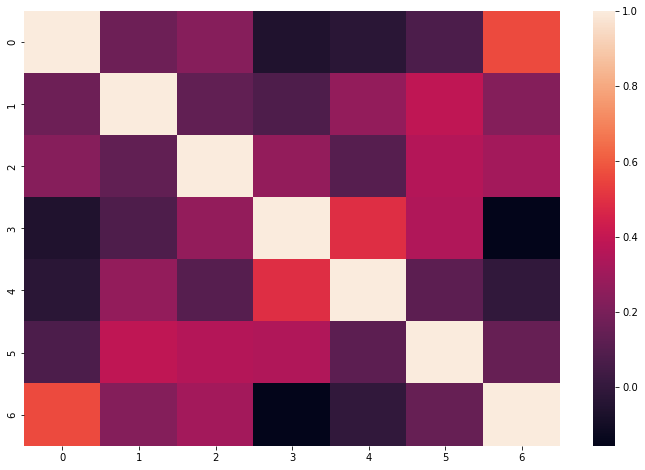

In [181]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmat)

In [182]:
def getCorr(data,threshold):
  corr_col = set()
  corrmat = data.corr()
  for i in range(len(corrmat.columns)):
    for j in range(i):
      if abs(corrmat.iloc[i,j]) > threshold :
        colname = corrmat.columns[i]
        corr_col.add(colname)
  return corr_col


In [183]:
corr_features = getCorr(x_train_unique,0.85)
# corr_features
len(corr_features)

0

### Feature Grouping and stacking


In [184]:
corrmat

,0,1,2,3,4,5,6
0,1.000000,0.168002,0.232943,-0.060292,-0.026094,0.074500,0.565708
1,0.168002,1.000000,0.133554,0.081601,0.270652,0.387972,0.229776
2,0.232943,0.133554,1.000000,0.269381,0.104418,0.357730,0.309822
3,-0.060292,0.081601,0.269381,1.000000,0.494062,0.346086,-0.155913
4,-0.026094,0.270652,0.104418,0.494062,1.000000,0.121561,-0.002715
5,0.074500,0.387972,0.357730,0.346086,0.121561,1.000000,0.151060
6,0.565708,0.229776,0.309822,-0.155913,-0.002715,0.151060,1.000000


In [185]:
corrdata = corrmat.abs().stack()
corrdata

0  0    1.000000
   1    0.168002
   2    0.232943
   3    0.060292
   4    0.026094
   5    0.074500
   6    0.565708
1  0    0.168002
   1    1.000000
   2    0.133554
   3    0.081601
   4    0.270652
   5    0.387972
   6    0.229776
2  0    0.232943
   1    0.133554
   2    1.000000
   3    0.269381
   4    0.104418
   5    0.357730
   6    0.309822
3  0    0.060292
   1    0.081601
   2    0.269381
   3    1.000000
   4    0.494062
   5    0.346086
   6    0.155913
4  0    0.026094
   1    0.270652
   2    0.104418
   3    0.494062
   4    1.000000
   5    0.121561
   6    0.002715
5  0    0.074500
   1    0.387972
   2    0.357730
   3    0.346086
   4    0.121561
   5    1.000000
   6    0.151060
6  0    0.565708
   1    0.229776
   2    0.309822
   3    0.155913
   4    0.002715
   5    0.151060
   6    1.000000
dtype: float64

In [186]:
corrdata = corrdata.sort_values(ascending = False)
corrdata

6  6    1.000000
5  5    1.000000
1  1    1.000000
2  2    1.000000
4  4    1.000000
3  3    1.000000
0  0    1.000000
   6    0.565708
6  0    0.565708
4  3    0.494062
3  4    0.494062
5  1    0.387972
1  5    0.387972
2  5    0.357730
5  2    0.357730
   3    0.346086
3  5    0.346086
6  2    0.309822
2  6    0.309822
1  4    0.270652
4  1    0.270652
3  2    0.269381
2  3    0.269381
0  2    0.232943
2  0    0.232943
1  6    0.229776
6  1    0.229776
1  0    0.168002
0  1    0.168002
3  6    0.155913
6  3    0.155913
   5    0.151060
5  6    0.151060
1  2    0.133554
2  1    0.133554
5  4    0.121561
4  5    0.121561
2  4    0.104418
4  2    0.104418
3  1    0.081601
1  3    0.081601
0  5    0.074500
5  0    0.074500
0  3    0.060292
3  0    0.060292
4  0    0.026094
0  4    0.026094
6  4    0.002715
4  6    0.002715
dtype: float64

In [187]:
corrdata = corrdata[corrdata > 0.4]
corrdata = corrdata[corrdata < 1]
corrdata

0  6    0.565708
6  0    0.565708
4  3    0.494062
3  4    0.494062
dtype: float64

### Using Tree based classifier

In [188]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train_unique,y_train)

RandomForestClassifier(random_state=0)

In [189]:
features = x_train_unique.columns
features

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [190]:
importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis = 1)
importance.columns = ['features','importance']
importance.sort_values(by = 'importance',ascending = False,inplace = True)
importance

,features,importance
1,1,0.459076
6,6,0.173515
5,5,0.145419
2,2,0.065453
4,4,0.064187
3,3,0.046579
0,0,0.045771


In [191]:
train = x_train_unique.drop([2,3],axis = 1)
test = x_test_unique.drop([2,3],axis = 1)

### Final Score

In [192]:
%%time
y_pred,model = randomForest(train,test,y_train,y_test)

Accuracy(Testing Data) : 
0.9519230769230769
CPU times: user 280 ms, sys: 29.6 ms, total: 310 ms
Wall time: 353 ms


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.94      0.98      0.96        62

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



### Saving the model

In [194]:
import pickle
with open('model.sav','wb') as f :
  pickle.dump(model,f)

In [202]:
with open('model.sav','rb') as f:
  model = pickle.load(f)
p = model.predict(test)
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.94      0.98      0.96        62

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104

